<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/B1_%E8%82%A1%E7%A5%A8%E8%B2%A1%E5%8B%99%E5%88%86%E6%9E%90/A3_%E5%85%AC%E5%8F%B8%E5%90%8D%E7%A8%B1%26%E7%B5%B1%E4%B8%80%E7%B7%A8%E8%99%9F%E6%95%B4%E6%89%B9%E5%BF%AB%E9%80%9F%E6%9F%A5%E8%A9%A2_230919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔥🔥🔥 經濟部商業司-公司名稱&統一編號整批快速查詢**


## **👉主要使用網址**
* [經濟部商業司-商工登記公示資料查詢服務: ](https://findbiz.nat.gov.tw/fts/query/QueryBar/queryInit.do)
為傳統查詢公司基本資料網頁，輸入公司名稱、統一編號等資訊，可快速查詢公司基本資料，如負責人、實收資本額、最後變更登記等資訊。
* [工商行政資料開放平台: ](https://data.gcis.nat.gov.tw/main/index#)
為政府開放API開放平台，具有公司登記基本資料、商業登記基本資料等API資料開放，可方便民眾如有整批查詢公司資料之所需。
  * [【公司名稱整批查詢】API-公司登記關鍵字查詢:](https://data.gcis.nat.gov.tw/od/demo_cond/6BBA2268-1367-4B42-9CCA-BC17499EBE8C)
  本次主要使用之網站，可透過模糊比對公司名稱，快速查詢 **統一編號、公司狀況、公司名稱、 資本總額（登記資本額）、實收資本額、 代表人姓名、 公司所在地、登記機關、 核准設立日期、最後核准變更日期。**
  > 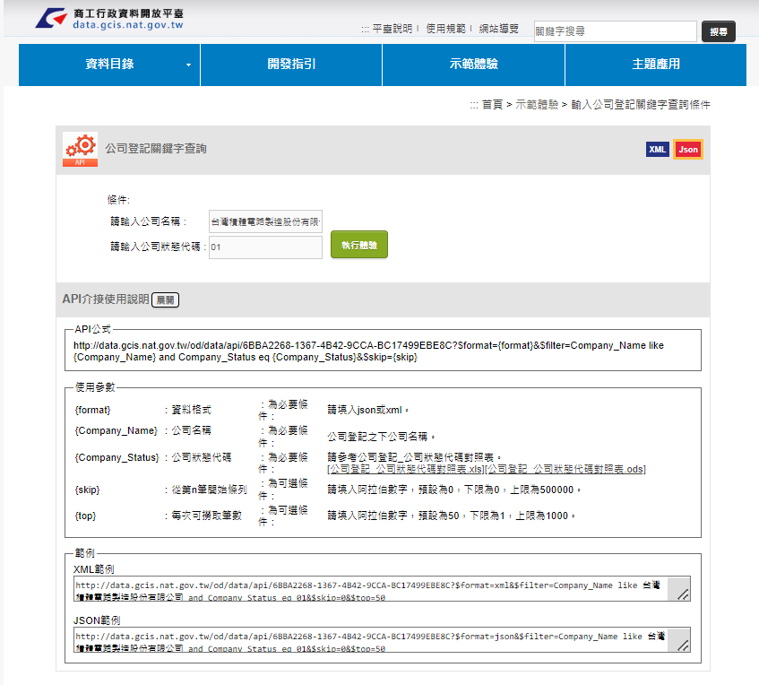

  * [【統一編號整批查詢】API-公司登記基本資料-應用一:](https://data.gcis.nat.gov.tw/od/demo_cond/5F64D864-61CB-4D0D-8AD9-492047CC1EA6)
  本次主要使用之網站，可透過統一編號，快速查詢 **公司狀況、公司名稱、 資本總額（登記資本額）、實收資本額、 代表人姓名、 公司所在地、登記機關、 核准設立日期、最後核准變更日期。**
  > 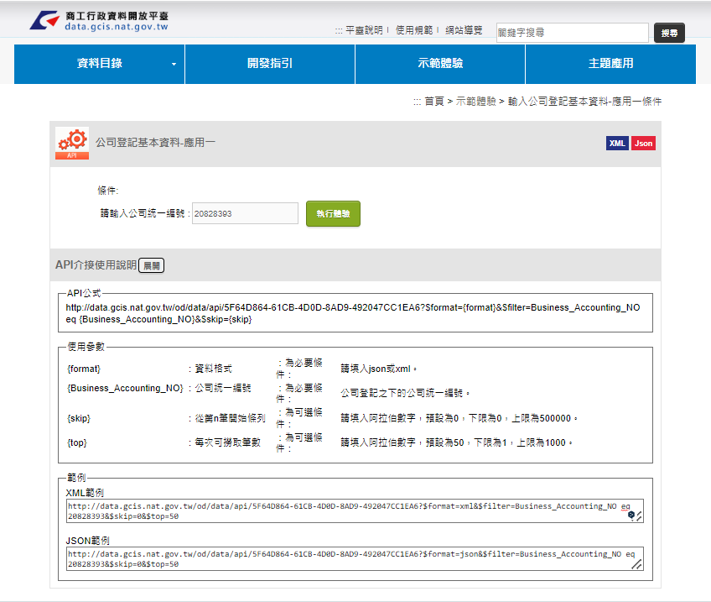



### **👉1.指定google雲端路徑&匯入套件**

In [ ]:
#指定google雲端路徑，方便儲存與下載檔案
import os
os.chdir('/content/drive/MyDrive/colab_cloud/tw_finance/經濟部商業司')

In [ ]:
#匯入必要套件
import pandas as pd
import requests
import xml.etree.ElementTree as ET
import time

### **👉2.公司名稱整批查詢**
* 打開company_name.csv檔案
* 將公司名稱中英文、以及非相關字如分公司排除
* 於原路徑下載company_name_download.csv檔案
* 整批查詢成果如下
> 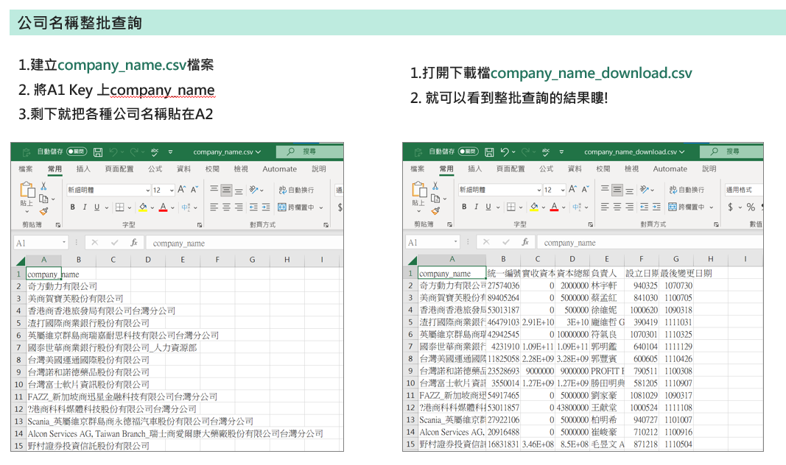

In [ ]:
def load_data():
    dataset = pd.read_csv('company_name.csv',encoding='big5') #讀取csv檔案
    data = dataset['company_name'].tolist() #list() 從dataset變量中，提取'公司名稱'之列，並將他們儲存在data表中
    # 提出xxx股份有限公司、xxx有限公司
    for i in range(len(data)):
        import re #正則表達式
        #將data list轉為string
        company_str = str(data[i])
        #使用正則表達式來取代字串中的特殊字符
        company_str1 = re.sub(r"[\(\)/_ ]", "", company_str)
        company_str2 = re.sub(r"[a-zA-Z]", "", company_str1)
        #將data list轉為string，並尋找中文
        company_chinese = re.findall(r'[\u4e00-\u9fa5]+', company_str2)
        #將result_chinese轉為string，並將股份有限公司，取代成"股份有限公司,
        company_comma =str(company_chinese).replace('公司','公司,')
        company_split = company_comma.split(',')
        company_all = company_split[0]
        company_name = re.sub(r"[\[\]\' ]", "", company_all)
        data[i] = company_name

    return dataset, data

def exc(data):## load
    #excel預計新增欄位
    統一編號 = []
    公司名稱 = []
    實收資本額 = []
    資本總額 = []
    負責人 = []
    設立日期 = []
    最後變更日期 = []

    #判斷公司登記是否有，如果有len(root) == 1；如果沒有len(root) == 0
    progress = 1
    for i in data:
        #進度軸
        print('進度: ' + str(progress) + ' / '+ str(len(data))) #進度: 1 / 22
        print('查詢公司: ', i) #查詢公司名稱
        progress += 1
        #格式化api地址
        format = 'xml' #json
        Company_Name = i #公司名稱
        Company_Status = '01' #公司狀態代碼 01=核准設立
        html = requests.get(f'http://data.gcis.nat.gov.tw/od/data/api/6BBA2268-1367-4B42-9CCA-BC17499EBE8C?$format={format}&$filter=Company_Name%20like%20{Company_Name}%20and%20Company_Status%20eq%20{Company_Status}&$skip=0&$top=50')
        root = ET.fromstring(html.text) #請求取得 XML 格式的公司資料
        #判斷是否查到到公司，len(root) == 1>查的到；len(root) == 0>查不到
        if len(root) == 1:
          公司名稱.append(root[0][1].text)
          統一編號.append(root[0][0].text)
          實收資本額.append(root[0][5].text)
          資本總額.append(root[0][4].text)
          負責人.append(root[0][6].text)
          設立日期.append(root[0][10].text)
          最後變更日期.append(root[0][11].text)
          print(root[0][3].text) #核准設立
          print('------------')
        elif len(root) == 0:
          公司名稱.append('查無資料')
          統一編號.append('查無資料')
          實收資本額.append('查無資料')
          資本總額.append('查無資料')
          負責人.append('查無資料')
          設立日期.append('查無資料')
          最後變更日期.append('查無資料')
          print('查無資料...')
          print('------------')
    time.sleep(2)

    return 公司名稱,統一編號, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期


def save(dataset_new, 公司名稱, 統一編號, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期): #儲存新欄位
    columns_new = list(zip(公司名稱, 統一編號, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期))
    columns_data = pd.DataFrame(columns_new, columns=['公司名稱','統一編號', '實收資本額', '資本總額', '負責人', '設立日期', '最後變更日期'])
    dataset_new= pd.merge(dataset,columns_data,left_index=True,right_index=True)
    dataset_new.to_csv('company_name_download.csv',index=False, encoding='utf-8') #, index=False


if __name__ == '__main__':
    dataset, data = load_data()
    公司名稱, 統一編號, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期 = exc(data)
    save(dataset, 公司名稱, 統一編號, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期) #儲存欄位
    print('company_name_download.csv檔案已完成!!')

進度: 1 / 15
查詢公司:  英屬維京群島商瑞嘉耐思科技有限公司
核准登記
------------
進度: 2 / 15
查詢公司:  
查無資料...
------------
進度: 3 / 15
查詢公司:  新加坡商鈦坦科技股份有限公司
核准登記
------------
進度: 4 / 15
查詢公司:  台灣利優資訊科技有限公司
核准設立
------------
進度: 5 / 15
查詢公司:  克耐得資訊有限公司
核准設立
------------
進度: 6 / 15
查詢公司:  新加坡商鈦坦科技股份有限公司
核准登記
------------
進度: 7 / 15
查詢公司:  社團法人國際特赦組織台灣分會
查無資料...
------------
進度: 8 / 15
查詢公司:  華翰物產實業股份有限公司
核准設立
------------
進度: 9 / 15
查詢公司:  凱文科技服務有限公司
核准設立
------------
進度: 10 / 15
查詢公司:  瑞嘉軟體科技股份有限公司
核准設立
------------
進度: 11 / 15
查詢公司:  英業達股份有限公司
核准設立
------------
進度: 12 / 15
查詢公司:  台灣寶尊電子商務股份有限公司
核准設立
------------
進度: 13 / 15
查詢公司:  華翰物產實業股份有限公司
核准設立
------------
進度: 14 / 15
查詢公司:  摩揪台灣股份有限公司
核准設立
------------
進度: 15 / 15
查詢公司:  瑞嘉軟體科技股份有限公司
核准設立
------------
company_name_download.csv檔案已完成!!


### **👉3.統一編號整批查詢**
* 讀取company_id.csv檔案
* 若id沒有8位數，自動補0至8位數
* 於原路徑下載完，檔名為company_id_download.csv
* 查詢結果如下
> 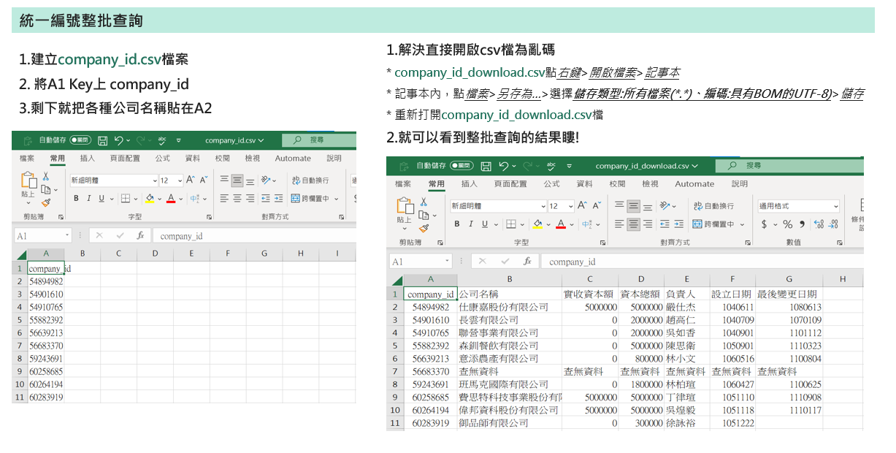

In [ ]:
def load_data():
    dataset = pd.read_csv('company_id.csv') #讀取csv檔案
    ## test 1000 data## dataset = dataset[:10] #讀取前10行檔案
    data = list(dataset['company_id']) #從dataset變量中，提取'company_id'之列，並將他們儲存在data表中

    ## 檢查是否有八位數，沒有就前面補0
    for i in range(len(data)):
        data[i] = str(data[i]).zfill(8) #zfill()在左邊添加0，直到變成指定長度，確保都是8碼數字

    return dataset, data

def exc(data):## load
    #excel預計新增欄位
    公司名稱 = []
    實收資本額 = []
    資本總額 = []
    負責人 = []
    設立日期 = []
    最後變更日期 = []

    ## 檢查營業狀態: 公司登記
    progress = 1
    for i in data:
        print('進度: ' + str(progress) + ' / '+ str(len(data))) #進度: 1 / 22
        print('查詢公司: ', i) #查詢公司:  54894982
        progress += 1
        html = requests.get(f'https://data.gcis.nat.gov.tw/od/data/api/5F64D864-61CB-4D0D-8AD9-492047CC1EA6?$format=xml&$filter=Business_Accounting_NO%20eq%20{i}&$skip=0&$top=50')
        root = ET.fromstring(html.text) #請求取得 XML 格式的公司資料
        #print(html.text)#     print(root[0][3].text)
        if len(root) == 1:
            公司名稱.append(root[0][2].text)
            實收資本額.append(root[0][4].text)
            資本總額.append(root[0][3].text)
            負責人.append(root[0][5].text)
            設立日期.append(root[0][8].text)
            最後變更日期.append(root[0][9].text)
            print(root[0][1].text)
            print('------------')
        elif len(root) == 0:
            公司名稱.append('查無資料')
            實收資本額.append('查無資料')
            資本總額.append('查無資料')
            負責人.append('查無資料')
            設立日期.append('查無資料')
            最後變更日期.append('查無資料')
            print('查無資料...')
            print('------------')
    time.sleep(2)

    return 公司名稱, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期


def save(dataset_new, 公司名稱, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期): #儲存新欄位
    columns_new = list(zip(公司名稱, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期))
    columns_data = pd.DataFrame(columns_new, columns=['公司名稱', '實收資本額', '資本總額', '負責人', '設立日期', '最後變更日期'])
    dataset_new= pd.merge(dataset,columns_data,left_index=True,right_index=True)
    dataset_new.to_csv('company_id_download.csv',index=False, encoding='utf-8') #, index=False


if __name__ == '__main__':
    dataset, data = load_data()
    公司名稱, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期 = exc(data)
    save(dataset, 公司名稱, 實收資本額, 資本總額, 負責人, 設立日期, 最後變更日期)
    print('company_id_download.csv檔案已完成!!')

進度: 1 / 10
查詢公司:  54894982
核准設立
------------
進度: 2 / 10
查詢公司:  54901610
核准設立
------------
進度: 3 / 10
查詢公司:  54910765
核准設立
------------
進度: 4 / 10
查詢公司:  55882392
核准設立
------------
進度: 5 / 10
查詢公司:  56639213
核准設立
------------
進度: 6 / 10
查詢公司:  56683370
查無資料...
------------
進度: 7 / 10
查詢公司:  59243691
核准設立
------------
進度: 8 / 10
查詢公司:  60258685
核准設立
------------
進度: 9 / 10
查詢公司:  60264194
核准設立
------------
進度: 10 / 10
查詢公司:  60283919
核准設立
------------
company_id_download.csv檔案已完成!!
